# Week4授業課題 信用情報の学習

#### 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


- 何を学習し、何を予測するのか  
学習するもの：このホームクレジット社（住宅ローンの会社）から提供されている電話会社や取引情報を含む様々な代替データを利用して、クライアントの返済能力を学習します。
予測するもの：TARGET変数である返済能力の確率を予測します。

- どのようなファイルを作りKaggleに提出するか  
SK_ID_CURR と TARGETのcsvファイルを送信する。

- 提出されたものはどういった指標値で評価されるのか  
予測された確率と観測されたターゲンット間のROC曲線の下の領域で評価される。
実際ROC曲線は、診断法がどれぐらい有用なのかを知るときに使われ、曲線下の面積（AUC）によって定量化されます。

#### 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# データ取得
data = pd.read_csv("../../data/home-credit-default-risk/application_train.csv")
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### 分析

In [3]:
#ターゲットとの相関が高い特徴量を調べる
df_s = np.abs(data.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64

In [4]:
#特徴量同士の相関を確認
data[["DAYS_BIRTH" , "EXT_SOURCE_3"]].corr()

,DAYS_BIRTH,EXT_SOURCE_3
DAYS_BIRTH,1.000000,-0.205478
EXT_SOURCE_3,-0.205478,1.000000


#### 前処理

In [5]:
#TARGET及びTARGETと相関の高い特徴量２つを抜き出して欠損値を処理
rawdata = data.loc[: , ["EXT_SOURCE_3", "DAYS_BIRTH", "TARGET"]]
Xa = rawdata.dropna(how = "any") # 欠損値削除
Xa.head()

,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.139376,-9461,1
2,0.729567,-19046,0
5,0.621226,-16941,0
6,0.492060,-13778,0
7,0.540654,-18850,0


In [6]:
#後のデータ処理のためにターゲット変数を分ける
X = Xa.iloc[: , :2]
y = Xa.iloc[: , 2]

#カテゴリカルデータをダミー変数化
data = pd.get_dummies(data)
print(data.shape)

#欠損値を可視化 
msno.bar(data)

#欠損値がある列を削除
data = data.dropna(how='any', axis=0)
data = data.dropna(how='any', axis=1)
print(data.shape)

#traget0, target1のサンプルを500ずつランダム取り出す。（ターゲット数が不均衡のため）
#taget0とtarget1にデータを分割

#target0とtarget1にデータを分割
data0 = data.query("TARGET == 0")
data1 = data.query("TARGET == 1")

#ランダムに500サンプルを抽出
data0 = data0.sample(n=500)
data1 = data1.sample(n=500)

#data0とdata1を結合する
data01 = pd.concat([data0, data1])
data01.head()


#特徴量とラベルに分ける
X = data01.drop("TARGET", axis=1) # ターゲットだけ削除して特徴量だけ取得
X.head()

#関連のありそうなカラムで散布図プロット して分析
plt.scatter(X["AMT_INCOME_TOTAL"],X["REGION_POPULATION_RELATIVE"],c = "pink")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("REGION_POPULATION_RELATIVE")
plt.legend()
plt.show()

y = data01.loc[:,["TARGET"]]
y.head()

In [7]:
#0が優良支払者、１が滞納者
# plt.hist(y, bins=10, color="pink")
# plt.show()

# データセット分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [8]:
#標準化処理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#線形回帰で学習
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#推測
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

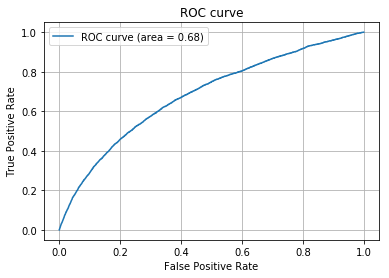

In [11]:
#ROC曲線とAUCによる評価
from sklearn import metrics

fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

#なんか上手く動かない。。predictが怪しい。。
#モデル取得（インスタンス作成）
reg = LinearRegression()
#学習
reg.fit(X_train, y_train)
#推定
y_pred_reg = reg.predict(X_val)
print("推定値：{}".format(y_pred_reg[:5]))
print("正解：{}".format(y[:5]))


In [12]:
print(y.shape)

(246546,)


In [13]:
print(y)

0         1
2         0
5         0
6         0
7         0
8         0
10        0
11        0
12        0
13        0
15        0
16        0
18        0
19        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
30        0
32        0
33        0
35        0
36        0
37        0
38        0
39        0
         ..
307476    0
307477    0
307478    0
307479    0
307480    0
307481    1
307482    0
307483    0
307485    0
307486    0
307487    0
307488    0
307489    1
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307502    0
307503    0
307505    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 246546, dtype: int64


#パラメーターが間違っているのか上手く動かない。。
#評価（ROC曲線のカーブ）

#FPR,TPR(、しきい値)を算出
fpr. tpr, thresholds = metrics.roc_curve(y_val, y_pred_reg)

#AUC
auc = metrics.auc(fpr,tpr)

#ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.grid(True)

In [14]:
print("AUC=", auc)

AUC= 0.6827547774907174


#### 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [15]:
# データ取得
test_data = pd.read_csv("../../data/home-credit-default-risk/application_test.csv")
test_data.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test_data.shape

(48744, 121)

In [17]:
rawdata = test_data.loc[: ,["SK_ID_CURR", "EXT_SOURCE_3", "DAYS_BIRTH"]]
Xa_test_origin = rawdata.dropna(how = "any")
Xa_test_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40076 entries, 0 to 48743
Data columns (total 3 columns):
SK_ID_CURR      40076 non-null int64
EXT_SOURCE_3    40076 non-null float64
DAYS_BIRTH      40076 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [18]:
SK_ID_CURR_Dropped = Xa_test_origin["SK_ID_CURR"]

In [19]:
Xa_test = Xa_test_origin.drop("SK_ID_CURR" , axis = 1)

In [20]:
SK_ID_CURR_Dropped.head()

0    100001
1    100005
2    100013
3    100028
5    100042
Name: SK_ID_CURR, dtype: int64

In [21]:
Xa_test.head()

,EXT_SOURCE_3,DAYS_BIRTH
0,0.159520,-19241
1,0.432962,-18064
2,0.610991,-20038
3,0.612704,-13976
5,0.392774,-18604


In [22]:
#標準化処理

from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
sc_test.fit(Xa_test)
Xa_test_std = sc_test.transform(Xa_test)

In [23]:
#【問題２】で学習したモデルをテストデータに適用
y_test_pred = lr.predict(Xa_test_std)
y_test_pred.shape

(40076,)

In [24]:
#提出データ作成のために一度DF化
SK_ID_CURR_Dropped = pd.DataFrame(data = SK_ID_CURR_Dropped)
y_test_pred = pd.DataFrame(data = y_test_pred)

subfile = SK_ID_CURR_Dropped.join( y_test_pred)

In [25]:
subfile.to_csv("subfile.csv" )

#### 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


どの特徴量を使うか
どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [26]:
rawdata_b = data.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "TARGET"]]
rawdata_b.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.083037,0.262949,0.139376,-9461,1
1,0.311267,0.622246,NaN,-16765,0
2,NaN,0.555912,0.729567,-19046,0
3,NaN,0.650442,NaN,-19005,0
4,NaN,0.322738,NaN,-19932,0


In [27]:
#欠損値処理
Xb = rawdata_b.dropna(how = "any")
Xb.shape

(109589, 5)

In [28]:
#分割
y = Xb.loc[: , "TARGET"]
Xb = Xb.iloc[: , :4]

In [29]:
#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xb , y , test_size = 0.25 , random_state = 0)

In [30]:
#標準化
sc_b = StandardScaler()
sc_b.fit(X_train)
X_b_std = sc_b.transform(X_train)
X_test = sc_b.transform(X_test)

In [31]:
#学習

lr_b = LinearRegression()
lr_b.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#推定
y_test_pred = lr_b.predict(X_test)
y_train_pred = lr_b.predict(X_train)

AUC= 0.7396674850107428


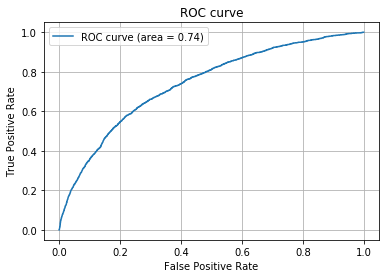

In [33]:
#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

特徴量を加えたことで、AUCの値が上がったことが分かる。では、さらに特徴量を増やすとどうなるか。

REGION_RATING_CLIENT_W_CITYとREGION_RATING_CLIENTを加えてみる。

In [34]:
rawdata_c = data.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT", "TARGET"]]
rawdata_c.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,2,2,1
1,0.311267,0.622246,NaN,-16765,1,1,0
2,NaN,0.555912,0.729567,-19046,2,2,0
3,NaN,0.650442,NaN,-19005,2,2,0
4,NaN,0.322738,NaN,-19932,2,2,0


In [35]:
#欠損値処理
Xc = rawdata_c.dropna(how = "any")
Xc.shape

(109589, 7)

AUC= 0.7401943332024297


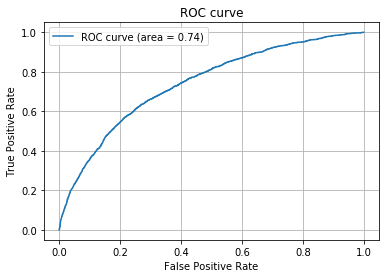

In [36]:
#分割
y = Xc.loc[: , "TARGET"]
Xc = Xc.iloc[: , :6]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xc , y , test_size = 0.25 , random_state = 0)

#標準化
sc_c = StandardScaler()
sc_c.fit(X_train)
X_c_std = sc_c.transform(X_train)
X_test = sc_c.transform(X_test)

#学習
lr_c = LinearRegression()
lr_c.fit(X_train , y_train)

#推定
y_test_pred = lr_c.predict(X_test)
y_train_pred = lr_c.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

AUC値はさらに上がったが、上がり方が鈍くなってきたことが分かる。

◇属性の組み合わせを試してみる（特徴量の創出）
ここで、いくつか属性を結合してみて、より相関の高い新しい特徴量を創出してみたい。

注目は、TARGETと相関の高かったREG_CITY_NOT_WORK_CITYとREG_CITY_NOT_LIVE_CITYである。

それぞれ、

REG_CITY_NOT_WORK_CITY：居住地と勤務地が地域レベルで異なる住所の場合、フラグ１
REG_CITY_NOT_LIVE_CITY：居住地と連絡先住所が地域レベルで異なる場合、フラグ１

というデータであり、これを単純に足し合わせてREG_CITY_LEVEL（value = [0,1,2]）という特徴量を作る。

In [37]:
data["REG_CITY_LEVEL"] = data["REG_CITY_NOT_WORK_CITY"] + data["REG_CITY_NOT_LIVE_CITY"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(data.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

「REG_CITY_NOT_WORK_CITY」と「REG_CITY_NOT_LIVE_CITY」より相関が高い「REG_CITY_LEVEL」が新たに作成されたことが分かる。

同じ考え方で、「REGION_RATING_CLIENT_W_CITY」と「REGION_RATING_CLIENT」を足し合わせた「SUM_REGION_RATING」も作成する。

In [38]:
data["SUM_REGION_RATING"] = data["REGION_RATING_CLIENT_W_CITY"] + data["REGION_RATING_CLIENT"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(data.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
SUM_REGION_RATING              0.060639
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

今度は新特徴量が生成前の２特徴量より高くならなかった。なぜだろう。単純に足し合わせただけではREGION_RATING_CLIENT_W_CITYの方がTARGETと相関が高い。つまり、より相関の低いREGION_RATING_CLIENT側に新特徴量が引っ張られてしまったからであろう。

では、「足す」のではなく、「掛け」てみたらどうなるだろう。

In [39]:
data["SUM_REGION_RATING"] = data["REGION_RATING_CLIENT_W_CITY"] * data["REGION_RATING_CLIENT"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(data.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
SUM_REGION_RATING              0.060179
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

足し合わせた時よりも、さらに相関が低くなってしまった。より負の傾向が増幅されてしまった形となる。

そこで、先ほどのREG_CITY_LEVELとREGION_RATING_CLIENT_W_CITYを掛け合わせた「CITY_RATING_LEVEL」を作ってみよう。

In [40]:
data["CITY_RATING_LEVEL"] = data["REGION_RATING_CLIENT_W_CITY"] * data["REG_CITY_LEVEL"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(data.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
CITY_RATING_LEVEL              0.064078
REGION_RATING_CLIENT_W_CITY    0.060893
SUM_REGION_RATING              0.060179
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
Name: TARGET, dtype: float64

DAYS_BIRTHの次に相関の高いCITY_RATING_LEVELが誕生した。

この値を使ってもう一度モデルを検証してみよう。

なお、「REGION_RATING_CLIENT」は「CITY_RATING_LEVEL」の創出には使われていないので、この値も使用してOKのはずだ。

In [41]:
rawdata_d = data.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "CITY_RATING_LEVEL", "REGION_RATING_CLIENT", "TARGET"]]
rawdata_d.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CITY_RATING_LEVEL,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,0,2,1
1,0.311267,0.622246,NaN,-16765,0,1,0
2,NaN,0.555912,0.729567,-19046,0,2,0
3,NaN,0.650442,NaN,-19005,0,2,0
4,NaN,0.322738,NaN,-19932,2,2,0


In [42]:
#欠損値処理
Xd = rawdata_d.dropna(how = "any")
Xd.shape

(109589, 7)

AUC= 0.7399542189791549


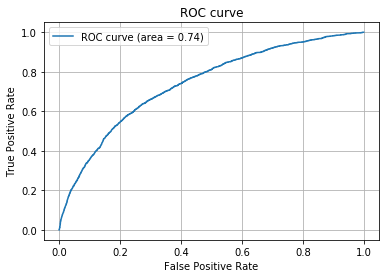

In [43]:
#分割
y = Xd.loc[: , "TARGET"]
Xd = Xd.iloc[: , :6]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xd , y , test_size = 0.25 , random_state = 0)

#標準化
sc_d = StandardScaler()
sc_d.fit(X_train)
X_d_std = sc_d.transform(X_train)
X_test = sc_d.transform(X_test)

#学習
lr_d = LinearRegression()
lr_d.fit(X_train , y_train)

#推定
y_test_pred = lr_d.predict(X_test)
y_train_pred = lr_d.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

逆にスコアが低くなってしまった。

REGION_RATING_CLIENT_W_CITYを抜いてしまったからだろうか。

REGION_RATING_CLIENT_W_CITYを加えてもう一度試してみる。

In [44]:
rawdata_e = data.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "CITY_RATING_LEVEL", "REGION_RATING_CLIENT_W_CITY",
                        "REGION_RATING_CLIENT", "TARGET"]]
rawdata_e.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CITY_RATING_LEVEL,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,0,2,2,1
1,0.311267,0.622246,NaN,-16765,0,1,1,0
2,NaN,0.555912,0.729567,-19046,0,2,2,0
3,NaN,0.650442,NaN,-19005,0,2,2,0
4,NaN,0.322738,NaN,-19932,2,2,2,0


In [45]:
#欠損値処理
Xe = rawdata_e.dropna(how = "any")
Xe.shape

(109589, 8)

AUC= 0.7401872589157568


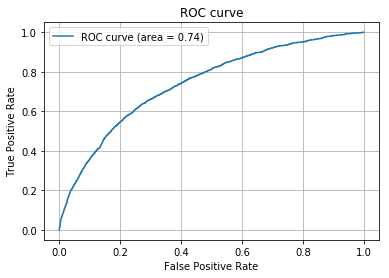

In [46]:
#分割
y = Xe.loc[: , "TARGET"]
Xe = Xe.iloc[: , :7]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xe , y , test_size = 0.25 , random_state = 0)

#標準化
sc_e = StandardScaler()
sc_e.fit(X_train)
X_e_std = sc_e.transform(X_train)
X_test = sc_e.transform(X_test)

#学習
lr_e = LinearRegression()
lr_e.fit(X_train , y_train)

#推定
y_test_pred = lr_e.predict(X_test)
y_train_pred = lr_e.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

残念ながら、新しい特徴量は役に立たなかったようだ。（なぜだ？！）

◇欠損値補完
ここで、視点を変えてみよう。

これまで、データセットに対して欠損値のあるサンプルを削除するという方法でモデルを検証してきた。

これを、欠損値を補完することで精度が上がらないか試してみる。

In [47]:
rawdata_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
EXT_SOURCE_1                   134133 non-null float64
EXT_SOURCE_2                   306851 non-null float64
EXT_SOURCE_3                   246546 non-null float64
DAYS_BIRTH                     307511 non-null int64
CITY_RATING_LEVEL              307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
REGION_RATING_CLIENT           307511 non-null int64
TARGET                         307511 non-null int64
dtypes: float64(3), int64(5)
memory usage: 18.8 MB


EXT_SOURCE_1〜3のデータに欠損値が確認できるので、これらの欠損値を中央値で補完する。

In [48]:
#中央値の生成
median1 = rawdata_e["EXT_SOURCE_1"].median()
median2 = rawdata_e["EXT_SOURCE_2"].median()
median3 = rawdata_e["EXT_SOURCE_3"].median()

print("EXT_SOURCE_1の中央値：{}".format(median1))
print("EXT_SOURCE_2の中央値：{}".format(median2))
print("EXT_SOURCE_3の中央値：{}".format(median3))
print("---------------------------------------------------------------")

#DataFrameのコピー
rawdata_f = rawdata_e.copy()

#中央値で補完
rawdata_f["EXT_SOURCE_1"].fillna(median1, inplace=True)
rawdata_f["EXT_SOURCE_2"].fillna(median2, inplace=True)
rawdata_f["EXT_SOURCE_3"].fillna(median3, inplace=True)

###なお、scikit-learnのImputerクラスでも同様のことが可能

print(rawdata_f.info())
print("---------------------------------------------------------------")
print(rawdata_f.head(15))

EXT_SOURCE_1の中央値：0.5059979305057544
EXT_SOURCE_2の中央値：0.5659614260608526
EXT_SOURCE_3の中央値：0.5352762504724826
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
EXT_SOURCE_1                   307511 non-null float64
EXT_SOURCE_2                   307511 non-null float64
EXT_SOURCE_3                   307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
CITY_RATING_LEVEL              307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
REGION_RATING_CLIENT           307511 non-null int64
TARGET                         307511 non-null int64
dtypes: float64(3), int64(5)
memory usage: 18.8 MB
None
---------------------------------------------------------------
    EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  CITY_RATING_LEVEL  \
0       0.083037      0.262949      0.139376       -9461                  0   
1       0.

無事、欠損値を埋められたので、このDFで検証を行ってみる。

In [49]:
#DFの参照
Xf = rawdata_f
Xf.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CITY_RATING_LEVEL,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,0,2,2,1
1,0.311267,0.622246,0.535276,-16765,0,1,1,0
2,0.505998,0.555912,0.729567,-19046,0,2,2,0
3,0.505998,0.650442,0.535276,-19005,0,2,2,0
4,0.505998,0.322738,0.535276,-19932,2,2,2,0


AUC= 0.7171520852140917


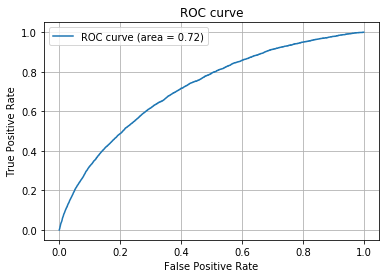

In [50]:
#分割
y = Xf.loc[: , "TARGET"]
Xf = Xf.iloc[: , :7]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xf , y , test_size = 0.25 , random_state = 0)

#標準化
sc_f = StandardScaler()
sc_f.fit(X_train)
X_f_std = sc_f.transform(X_train)
X_test = sc_f.transform(X_test)

#学習
lr_f = LinearRegression()
lr_f.fit(X_train , y_train)

#推定
y_test_pred = lr_f.predict(X_test)
y_train_pred = lr_f.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

サンプル数が増えた分、スコアが下がってしまった！！

が、信頼性は上がっていると考えられるので、実際にはこちらの方が望ましいと考えられる。

モデルの可視化
最後に、今まで作成したモデルの可視化を行ってみる。

今回は、LinearRegressionを使用したので、直線として表現できる。

#### モデルの可視化  
最後に、今まで作成したモデルの可視化を行ってみる。

今回は、LinearRegressionを使用したので、直線として表現できる。

In [51]:
#線形回帰の係数（coef）と切片（intercept）を比較
#係数はEXT_SOURCE_3

models = {"lr": [lr.coef_[0], lr.intercept_], "lr_b": [lr_b.coef_[2], lr_b.intercept_],
          "lr_c": [lr_c.coef_[2], lr_c.intercept_], "lr_d": [lr_d.coef_[2], lr_d.intercept_],
          "lr_e": [lr_e.coef_[2], lr_e.intercept_], "lr_f": [lr_f.coef_[2], lr_f.intercept_]
         }
df_models = pd.DataFrame(models, index=["coef", "intercept"])
df_models.head()

,lr,lr_b,lr_c,lr_d,lr_e,lr_f
coef,-0.045795,-0.194160,-0.194534,-0.193893,-0.193969,-0.207790
intercept,0.078055,0.280112,0.267559,0.265715,0.263829,0.343641


In [52]:
# #EXT_SOURCE_3の特徴量に関してプロット

# plt.figure(figsize=(12,9))
# plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr.coef_[0] + lr.intercept_ , color="r", label = "lr")
# plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_b.coef_[2] + lr_b.intercept_, color="b", label = "lr_b")
# plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_c.coef_[2] + lr_c.intercept_ , color="y", label = "lr_c")
# plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_d.coef_[2] + lr_d.intercept_, color="g", label = "lr_d")
# plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_e.coef_[2] + lr_e.intercept_, color="m", label = "lr_e")
# plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_f.coef_[2] + lr_f.intercept_, color="c", label = "lr_f")
# plt.legend()